<a href="https://colab.research.google.com/github/SefiyeArican/Sentimenal-Analysis/blob/main/Sentimenal_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
!pip install nltk
!pip install textblob
!pip install wordcloud

In [64]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

In [99]:
filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)
pd.set_option("display.float_format", lambda x: "% 2f" % x)

In [66]:
df=pd.read_csv("amazon_reviews.csv")
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,% 2f,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",% 2f,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,% 2f,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,% 2f,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",% 2f,best deal around,1373673600,2013-07-13,513,0,0
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",It's mini storage. It doesn't do anything els...,% 2f,Not a lot to really be said,1367193600,2013-04-29,588,0,0
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,"[0, 0]",I have it in my phone and it never skips a bea...,% 2f,Works well,1382140800,2013-10-19,415,0,0
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""","[0, 0]",It's hard to believe how affordable digital ha...,% 2f,32 GB for less than two sawbucks...what's not ...,1404950400,2014-10-07,62,0,0
8,A2CYJO155QP33S,B007WTAJTO,4evryoung,"[1, 1]",Works in a HTC Rezound. Was running short of ...,% 2f,Loads of room,1395619200,2014-03-24,259,1,1
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,"[0, 0]","in my galaxy s4, super fast card, and am total...",% 2f,works great,1381449600,2013-11-10,393,0,0


Normalizing Case Folding <br>
1. Büyük harften küçük harfe çevirme
2. Noktalama işareti temizliği
3. Numeric değer temizliği

In [67]:
df["reviewText"]

0                                              No issues.
1       Purchased this for my device, it worked as adv...
2       it works as expected. I should have sprung for...
3       This think has worked out great.Had a diff. br...
4       Bought it with Retail Packaging, arrived legit...
                              ...                        
4910    I bought this Sandisk 16GB Class 10 to use wit...
4911    Used this for extending the capabilities of my...
4912    Great card that is very fast and reliable. It ...
4913    Good amount of space for the stuff I want to d...
4914    I've heard bad things about this 64gb Micro SD...
Name: reviewText, Length: 4915, dtype: object

In [68]:
df["reviewText"]=df["reviewText"].str.lower()
df["reviewText"]

0                                              no issues.
1       purchased this for my device, it worked as adv...
2       it works as expected. i should have sprung for...
3       this think has worked out great.had a diff. br...
4       bought it with retail packaging, arrived legit...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable. it ...
4913    good amount of space for the stuff i want to d...
4914    i've heard bad things about this 64gb micro sd...
Name: reviewText, Length: 4915, dtype: object

In [69]:
df["reviewText"]=df["reviewText"].str.replace("[^\w\s]","", regex=True)
df["reviewText"]

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this 64gb micro sd ...
Name: reviewText, Length: 4915, dtype: object

In [70]:
df["reviewText"]=df["reviewText"].str.replace("\d","", regex=True)
df["reviewText"]

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4910    i bought this sandisk gb class  to use with my...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this gb micro sd ca...
Name: reviewText, Length: 4915, dtype: object

Stopwords

In [71]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
SW=stopwords.words("english")


In [73]:
df["reviewText"]=df["reviewText"].apply(lambda x: " ".join(x for x in str(x).split() if x not in SW))
df["reviewText"]

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected sprung higher capacity think ma...
3       think worked greathad diff bran gb card went s...
4       bought retail packaging arrived legit orange e...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used extending capabilities samsung galaxy not...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card crapping...
Name: reviewText, Length: 4915, dtype: object

Rarewords

In [74]:
#her kelimenin ne kadar sıklıkla geçtiğini tespit etmemize yarar
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()
temp_df

card          4603
gb            1725
phone         1685
works         1559
great         1445
              ... 
sharper          1
cheapos          1
gate             1
measuring        1
stealwould       1
Name: count, Length: 9701, dtype: int64

In [75]:
drop = temp_df[temp_df <= 1]
drop

conclusionmy       1
mbsbuy             1
flimsier           1
disappointedtry    1
priceokay          1
                  ..
sharper            1
cheapos            1
gate               1
measuring          1
stealwould         1
Name: count, Length: 5612, dtype: int64

In [76]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drop))
df['reviewText']

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected higher capacity think made bit ...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used capabilities samsung galaxy note greatly ...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card crapping...
Name: reviewText, Length: 4915, dtype: object

Tokenization <br>
Her kelimeyi token haline getirme işlemi

In [77]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
df['reviewText'].apply(lambda x: TextBlob(' '.join(x)).words).head()
df['reviewText']

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected higher capacity think made bit ...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used capabilities samsung galaxy note greatly ...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card crapping...
Name: reviewText, Length: 4915, dtype: object

In [79]:
df['reviewText'] = df['reviewText'].apply(lambda x: nltk.word_tokenize(x))
df['reviewText']

0                                                [issues]
1       [purchased, device, worked, advertised, never,...
2       [works, expected, higher, capacity, think, mad...
3       [think, worked, gb, card, went, south, one, he...
4       [bought, retail, packaging, arrived, legit, en...
                              ...                        
4910    [bought, sandisk, gb, class, use, htc, inspire...
4911    [used, capabilities, samsung, galaxy, note, gr...
4912    [great, card, fast, reliable, comes, optional,...
4913    [good, amount, space, stuff, want, fits, gopro...
4914    [ive, heard, bad, things, gb, micro, sd, card,...
Name: reviewText, Length: 4915, dtype: object

Lemmatization <br>
Kelimeleri köklerine ayırma

In [80]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [81]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))
df['reviewText']

0                                                   issue
1       purchased device worked advertised never much ...
2       work expected higher capacity think made bit e...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire month ...
4911    used capability samsung galaxy note greatly ex...
4912    great card fast reliable come optional adapter...
4913           good amount space stuff want fit gopro say
4914    ive heard bad thing gb micro sd card crapping ...
Name: reviewText, Length: 4915, dtype: object

In [82]:
tf = df["reviewText"].str.split(expand=True).stack().value_counts().reset_index()

In [83]:
tf.colums = ["words", "tf"]
tf

,index,count
0,card,5537
1,work,2044
2,phone,1909
3,gb,1756
4,great,1445
...,...,...
3683,itgreat,2
3684,undamaged,2
3685,estimate,2
3686,zune,2


In [84]:
tf.columns = ["words", "tf"]
tf

,words,tf
0,card,5537
1,work,2044
2,phone,1909
3,gb,1756
4,great,1445
...,...,...
3683,itgreat,2
3684,undamaged,2
3685,estimate,2
3686,zune,2


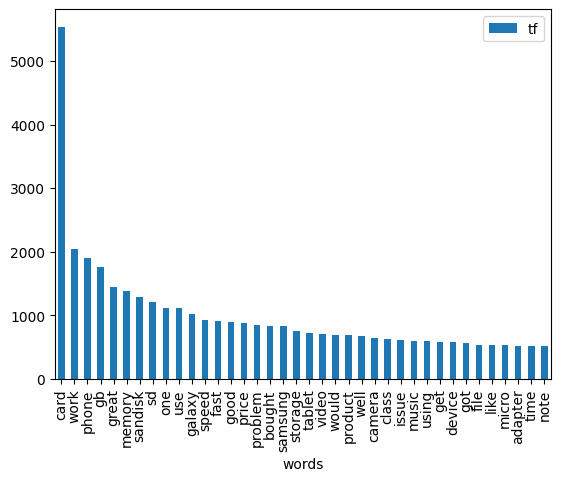

In [85]:
tf = (tf[tf["tf"] >= 500]).plot.bar(x="words",y="tf")
plt.show()

Wordcloud

In [86]:
Text = " ".join(i for i in df.reviewText) #tek metin haline getirdik

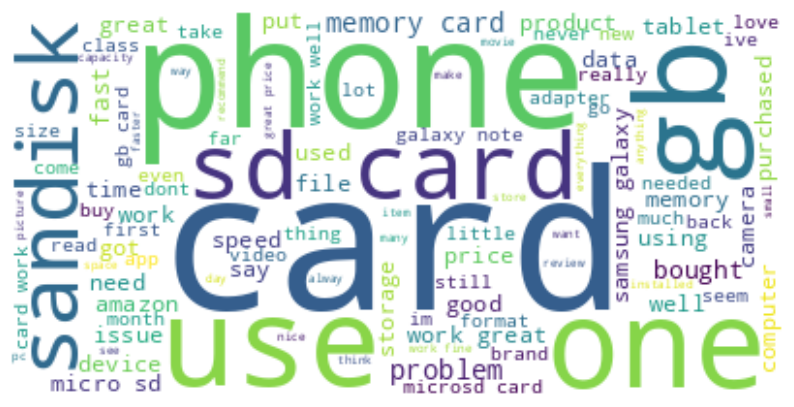

In [87]:
wordcloud=wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(Text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [88]:
wordcloud.to_file("wordcloud.png")

Sentiment Analysis<br>
Feeture engineering<br>

In [89]:
df["reviewText"].head()

0                                                issue
1    purchased device worked advertised never much ...
2    work expected higher capacity think made bit e...
3    think worked gb card went south one held prett...
4    bought retail packaging arrived legit envelope...
Name: reviewText, dtype: object

In [90]:
nltk.download("vader_lexicon") #kelimeleri vektörlüyoruz

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [91]:
sia = SentimentIntensityAnalyzer()

In [92]:
sia.polarity_scores("The film was good") #compound değeri sıfırdan büyükse pozitif bir cümledir

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [93]:
sia.polarity_scores("I like this music but it is not good as the other one")

{'neg': 0.209, 'neu': 0.673, 'pos': 0.118, 'compound': -0.3311}

In [94]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2    {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...
3    {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...
4    {'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.108, 'neu': 0.598, 'pos': 0.295, 'co...
7    {'neg': 0.077, 'neu': 0.65, 'pos': 0.272, 'com...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'comp...
Name: reviewText, dtype: object

In [95]:
df['reviewText'][0:10].apply(lambda x: sia.polarity_scores(' '.join(x)) if isinstance(x, list) else sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2    {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...
3    {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...
4    {'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.108, 'neu': 0.598, 'pos': 0.295, 'co...
7    {'neg': 0.077, 'neu': 0.65, 'pos': 0.272, 'com...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'comp...
Name: reviewText, dtype: object

In [96]:
#polarite score ataması yaptık
df["polarity_score"] = df["reviewText"].apply(lambda x: sia.polarity_scores(' '.join(x))["compound"] if isinstance(x, list) else sia.polarity_scores(x)["compound"])

In [100]:
df["polarity_score"]

0       0.000000
1       0.000000
2       0.401900
3       0.648600
4       0.859100
          ...   
4910    0.077200
4911    0.176100
4912    0.848100
4913    0.690800
4914    0.526700
Name: polarity_score, Length: 4915, dtype: float64

Future Engineering

In [182]:
df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0       neg
1       neg
2       pos
3       pos
4       pos
       ... 
4910    pos
4911    pos
4912    pos
4913    pos
4914    pos
Name: reviewText, Length: 4915, dtype: object

In [183]:
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(' '.join(x) if isinstance(x, list) else x)["compound"] > 0 else "neg")

In [184]:
df["sentiment_label"].value_counts()

sentiment_label
pos    3944
neg     971
Name: count, dtype: int64

In [185]:
# df.groupby("sentiment_label").agg({"overall": "mean"})
df.groupby("sentiment_label")["overall"].mean()

sentiment_label
neg    4.094748
pos    4.708925
Name: overall, dtype: float64

In [186]:
#encode işlemi
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])
df["sentiment_label"]

0       0
1       0
2       1
3       1
4       1
       ..
4910    1
4911    1
4912    1
4913    1
4914    1
Name: sentiment_label, Length: 4915, dtype: int64

In [187]:
y = df["sentiment_label"]
x = df["reviewText"]

Count Vectors: frekans temsiller<br>
TF-IDF Vectors: normalize edilmiş frekans temsiller<br>
Word Embeddings (Word2Vec, GloVe, BERT vs)

In [188]:
# words
# kelimelerin nümerik temsilleri

# characters
# karakterlerin numerik temsilleri

# ngram
a = """Bu örneği anlaşılabilmesi için daha uzun bir metin üzerinden göstereceğim.
N-gram'lar birlikte kullanılan kelimelerin kombinasyolarını gösterir ve feature üretmek için kullanılır"""

TextBlob(a).ngrams(3)

[WordList(['Bu', 'örneği', 'anlaşılabilmesi']),
 WordList(['örneği', 'anlaşılabilmesi', 'için']),
 WordList(['anlaşılabilmesi', 'için', 'daha']),
 WordList(['için', 'daha', 'uzun']),
 WordList(['daha', 'uzun', 'bir']),
 WordList(['uzun', 'bir', 'metin']),
 WordList(['bir', 'metin', 'üzerinden']),
 WordList(['metin', 'üzerinden', 'göstereceğim']),
 WordList(['üzerinden', 'göstereceğim', "N-gram'lar"]),
 WordList(['göstereceğim', "N-gram'lar", 'birlikte']),
 WordList(["N-gram'lar", 'birlikte', 'kullanılan']),
 WordList(['birlikte', 'kullanılan', 'kelimelerin']),
 WordList(['kullanılan', 'kelimelerin', 'kombinasyolarını']),
 WordList(['kelimelerin', 'kombinasyolarını', 'gösterir']),
 WordList(['kombinasyolarını', 'gösterir', 've']),
 WordList(['gösterir', 've', 'feature']),
 WordList(['ve', 'feature', 'üretmek']),
 WordList(['feature', 'üretmek', 'için']),
 WordList(['üretmek', 'için', 'kullanılır'])]

In [189]:
from sklearn.feature_extraction.text import CountVectorizer

In [190]:
corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']

In [191]:
# word frekans

vectorizer = CountVectorizer()
X_c = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [192]:
X_c.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [193]:
# n-gram frekans
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X_n = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names_out()

array(['and this', 'document is', 'first document', 'is the', 'is this',
       'second document', 'the first', 'the second', 'the third',
       'third one', 'this document', 'this is', 'this the'], dtype=object)

In [194]:
X_n.toarray()

array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]])

In [195]:
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(x)

vectorizer.get_feature_names_out()[10:15]  # 10 ve 15 arası satırları aldığımız için çıktı 0
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

TF-IDF

In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [197]:
tf_idf_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_vectorizer.fit_transform(x)

In [198]:
X_strings = X.apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X_strings)

In [199]:
X_tf_idf_word

<4915x3666 sparse matrix of type '<class 'numpy.float64'>'
	with 102064 stored elements in Compressed Sparse Row format>

In [200]:
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(X)

In [201]:
X_tf_idf_ngram

<4915x160083 sparse matrix of type '<class 'numpy.float64'>'
	with 219890 stored elements in Compressed Sparse Row format>

Logistic Regression

In [207]:
log_model = LogisticRegression().fit(X_tf_idf_word, y)

cross_val_score(log_model,
                X_tf_idf_word,
                y,
                scoring="accuracy",
                cv=5).mean() # 5 katmanlı bir mimari

0.830111902339776

In [209]:
# # new_review = pd.Series("this product is great")
# new_review = pd.Series("look at that shit very bad")
# # new_review = pd.Series("it was good but I am sure that it fits me")

# new_review = TfidfVectorizer().fit(X).transform(new_review)

# log_model.predict(new_review)

random_review = pd.Series(df["reviewText"].sample(1).values[0])

new_review = TfidfVectorizer().fit(X).transform(random_review)

log_model.predict(new_review)

array([1])